## 1. Import packages

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

## 2. Create Dummy Dataset

In [3]:
def getData(N, variance):
    pi = math.pi
    cos = math.cos
    sigma = math.sqrt(variance) #standard deviation
    X = np.random.rand(N, 1)
    mean = np.mean(X)
    noise = np.random.normal(mean, sigma, N)
    Y = []
    for x in X:   #next time try with polyval function
        y = cos(2*pi*x)
        Y.append(y)
    Y = Y + noise  #adding noise to the dummy dataset
    return [X,Y]

## 3. Define d degree polynomial function

In [4]:
def yFunc(coeffs, x):
    # this function gives an output c0 + c1x^1 + c2x^2, coeffs = [c0, c1, c2]
    polynomial = np.polynomial.polynomial.Polynomial(coeffs) 
    return polynomial(x)

## 4. Mean Square Error

In [5]:
def getMSE(N, actualList, predictedList):
    sum = 0
    for i in range(0,N):
        sum += (actualList[i] - predictedList[i])**2
    return sum/N

## 5. Calculate New coefficient using gradient descent

In [14]:
def calcNewCoeffs(N, randCoeffs, x, yActual, learningRate):
    yPredicted = [yFunc(randCoeffs, i) for i in x]
       
    partialCoeffs = [[] for j in range(len(randCoeffs))] 
    
    for x, ya, yp in list(zip(x, yActual, yPredicted)):  
        for i in range(len(randCoeffs)):
            partialCoeff = (x**i)*(ya - yp)
            partialCoeffs[i].append(partialCoeff)
            
    lamdba = 0.005
    gradient = []
    newCoeffs = []
    
    for i in range(len(randCoeffs)):
        gradient.append(((-2) * sum(partialCoeffs[i]))/N)
        newCoeffs.append(randCoeffs[i] - learningRate * gradient[i] - learningRate * lamdba * randCoeffs[i])
    
    return newCoeffs

## 6. Get the best fit for data by calculating new cooeficients over 320 epochs

In [7]:
def fitData(N, newCoeffs, x, yActual, epochs, learningRate, variance):
    yPredicted = [yFunc(newCoeffs, i) for i in x]
#     losses = []  # To calculate the loss graph
    for i in range(epochs):
        newCoeffs = calcNewCoeffs(N, newCoeffs, x, yActual, learningRate)
        newCoeffs = np.asarray(newCoeffs).flatten()
#         yPredicted = [yFunc(newCoeffs, j) for j in x]  # To calculate the loss graph
#         losses.append(getMSE(N, yActual, yPredicted))  # To calculate the loss graph
    
    yPredicted = [yFunc(newCoeffs, i) for i in x]
    newMse = getMSE(N, yActual, yPredicted)
    
    largeDataset = getData(1000, variance)
    newX = largeDataset[0]
    newYActual = largeDataset[1]
    newYPredicted = [yFunc(newCoeffs, i) for i in newX]
    newMseOfLargeDataset = getMSE(N, newYActual, newYPredicted)
    
    Ein = newMse
    Eout = newMseOfLargeDataset
    
#     # To calculate the loss graph
#     plt.figure(figsize=(8, 4))
#     plt.plot(losses, 'b-', label = 'loss')
#     plt.title('Loss over '+ str(epochs) + ' iterations')
#     plt.legend(loc="lower right")
#     plt.xlabel('Iterations')
#     plt.ylabel('MSE')
#     plt.show()
    
    return newCoeffs, Ein, Eout

## 7. Get the Ein and Eout for each value of N, d, and variance

In [8]:
def experiment(N, d, variance):
    totalEin = []
    totalEout = []
    M = 50
    
    for i in range(M):
        dataset = getData(N, variance)
        randCoeffs = np.random.randint(-5, 5, size = d+1)        
        coeffs = randCoeffs 
        x = dataset[0]
        yActual = dataset[1]       
        epochs = 320
        learningRate = 0.01
        
        output = fitData(N, randCoeffs, x, yActual, epochs, learningRate, variance) 
        totalEin.append(output[1])
        totalEout.append(output[2])
        
        
#         # to plot the graph with new coefficients
#         yPredictedFirst = [yFunc(coeffs, i) for i in x]
#         yPredictedLast = [yFunc(output[0], i) for i in x]
        
#         plt.figure(figsize=(10, 6))
#         plt.scatter(x, yActual, color='green', label="Y actual")
#         plt.scatter(x, yPredictedFirst, color = 'red', label="Y predicted with random coeff")
#         plt.scatter(x, yPredictedLast, color = 'gray', label="Y predicted with predicted coeff")
#         plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.title("Before the Gradient descent vs After the Gradient descent with L1 regularization when variance = %s, N = %s, D = %s"%(variance, N, d))
#         plt.xlabel("X")
#         plt.ylabel("Y")
#         plt.show()

    EinAverage = sum(totalEin)/M
    EoutAverage = sum(totalEout)/M
    
    return (EinAverage, EoutAverage)

## 8. Let start with the Experiment!!! Here we can print all data and look at the values

In [10]:
print("N -----\t----- d -----\t----- variance -----\t----- (Ein, Eout)")
for N in [2, 5, 10, 20, 50, 100, 200]:
    for variance in [0.05, 0.2]:
        for d in [1, 2, 4, 8, 16, 32, 64]:
            result = experiment(N, d, variance)
            print(N, "-----\t-----", d, "-----\t-----", variance, "-----\t-----", (result[0], result[1]))

N -----	----- d -----	----- variance -----	----- (Ein, Eout)
2 -----	----- 1 -----	----- 0.05 -----	----- (array([0.20563186]), array([0.84810221]))
2 -----	----- 2 -----	----- 0.05 -----	----- (array([0.18475951]), array([0.75956166]))
2 -----	----- 4 -----	----- 0.05 -----	----- (array([0.20045966]), array([0.76515658]))
2 -----	----- 8 -----	----- 0.05 -----	----- (array([0.16333934]), array([0.6145609]))
2 -----	----- 16 -----	----- 0.05 -----	----- (array([0.18399447]), array([0.74247306]))
2 -----	----- 32 -----	----- 0.05 -----	----- (array([0.21124432]), array([0.79069366]))
2 -----	----- 64 -----	----- 0.05 -----	----- (array([0.18806908]), array([0.84865789]))
2 -----	----- 1 -----	----- 0.2 -----	----- (array([0.39998397]), array([0.87826128]))
2 -----	----- 2 -----	----- 0.2 -----	----- (array([0.34838549]), array([0.68036276]))
2 -----	----- 4 -----	----- 0.2 -----	----- (array([0.34994851]), array([0.69843803]))
2 -----	----- 8 -----	----- 0.2 -----	----- (array([0.296933

200 -----	----- 2 -----	----- 0.2 -----	----- (array([0.72213833]), array([0.70167828]))
200 -----	----- 4 -----	----- 0.2 -----	----- (array([0.67039687]), array([0.67052758]))
200 -----	----- 8 -----	----- 0.2 -----	----- (array([0.62431796]), array([0.64387571]))
200 -----	----- 16 -----	----- 0.2 -----	----- (array([0.5976351]), array([0.62487746]))
200 -----	----- 32 -----	----- 0.2 -----	----- (array([0.60194141]), array([0.61966548]))
200 -----	----- 64 -----	----- 0.2 -----	----- (array([0.60819628]), array([0.61643246]))


## Observation of Ein/Eout-Degree D relation for different values of N

Ein for variance 0.05  is  [array([0.24695706]), array([0.19960958]), array([0.16865959]), array([0.22330952]), array([0.17058614]), array([0.24585026]), array([0.14274187])]
Eout for variance 0.05  is  [array([0.82203958]), array([0.62654291]), array([0.69252126]), array([0.65862574]), array([0.72953627]), array([0.83002143]), array([0.97712157])]
Ein for variance 0.2  is  [array([0.32687274]), array([0.4040158]), array([0.28585076]), array([0.20415687]), array([0.21537163]), array([0.19672245]), array([0.24460495])]
Eout for variance 0.2  is  [array([0.72868424]), array([0.980204]), array([0.89745877]), array([0.90192015]), array([1.38727149]), array([1.0441927]), array([0.65997114])]


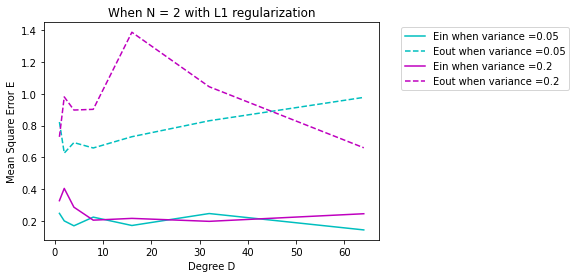

Ein for variance 0.05  is  [array([0.56384075]), array([0.55068954]), array([0.4951952]), array([0.4693709]), array([0.41893378]), array([0.45668425]), array([0.39902659])]
Eout for variance 0.05  is  [array([0.60547024]), array([0.59515334]), array([0.57719274]), array([0.51932134]), array([0.44984568]), array([0.50609011]), array([0.5234687])]
Ein for variance 0.2  is  [array([0.67258737]), array([0.63126401]), array([0.60748822]), array([0.61660904]), array([0.54784472]), array([0.60149146]), array([0.54850707])]
Eout for variance 0.2  is  [array([0.78754802]), array([0.73121545]), array([0.68037098]), array([0.64602452]), array([0.68568358]), array([0.64120442]), array([0.63444924])]


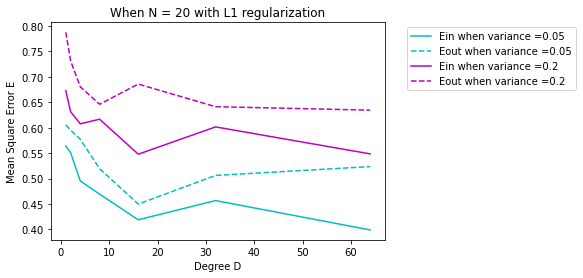

Ein for variance 0.05  is  [array([0.56254302]), array([0.55592248]), array([0.51596934]), array([0.48703023]), array([0.46115137]), array([0.45000242]), array([0.4456754])]
Eout for variance 0.05  is  [array([0.56462162]), array([0.5613605]), array([0.52777591]), array([0.48840745]), array([0.47045683]), array([0.46096044]), array([0.45575696])]
Ein for variance 0.2  is  [array([0.72260937]), array([0.71038794]), array([0.67163903]), array([0.62872694]), array([0.60388538]), array([0.6024869]), array([0.60312336])]
Eout for variance 0.2  is  [array([0.74026714]), array([0.70865783]), array([0.68836508]), array([0.63016573]), array([0.59840336]), array([0.61195045]), array([0.61123075])]


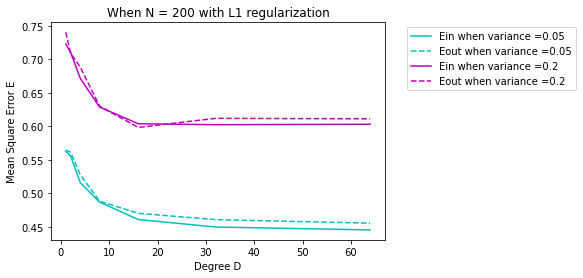

In [11]:
D = [1, 2, 4, 8, 16, 32, 64]
color = ['c-', 'c--', 'm-', 'm--']

for N in [2, 20, 200]:
    i = 0
    for variance in [0.05, 0.2]:
        Ein, Eout = [], []
        for d in D:
            result = experiment(N, d, variance)
            Ein.append(result[0])
            Eout.append(result[1])
        print("Ein for variance", variance, " is ", Ein)
        print("Eout for variance", variance, " is ", Eout)
        plt.plot(D, Ein, color[i], label="Ein when variance =%s"%(variance))
        plt.plot(D, Eout, color[i+1], label="Eout when variance =%s"%(variance))
        i = i + 2  
    plt.title("When N = %s with L1 regularization"%(N))
    plt.xlabel("Degree D")
    plt.ylabel("Mean Square Error E")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


## Observation of Ein/Eout-N relation for different values of Degree D

Ein [array([0.20538412]), array([0.4151287]), array([0.49672916]), array([0.53311371]), array([0.54528299]), array([0.53775371]), array([0.54704753])]
Eout [array([0.83038973]), array([0.66772028]), array([0.57436684]), array([0.56833248]), array([0.56535691]), array([0.57676173]), array([0.56092282])]
Ein [array([0.32896076]), array([0.51439571]), array([0.53353571]), array([0.65299865]), array([0.70829876]), array([0.69187864]), array([0.71133328])]
Eout [array([0.96573224]), array([0.74593176]), array([0.75337881]), array([0.73804857]), array([0.71440565]), array([0.70400894]), array([0.708913])]


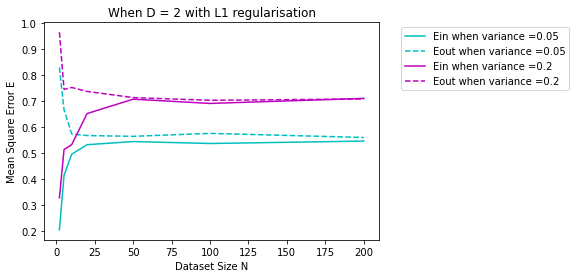

Ein [array([0.15252398]), array([0.325822]), array([0.40927195]), array([0.43457739]), array([0.48080157]), array([0.48106601]), array([0.48819135])]
Eout [array([0.82242359]), array([0.69763274]), array([0.5612091]), array([0.51452799]), array([0.50582077]), array([0.47937485]), array([0.48201356])]
Ein [array([0.28009272]), array([0.40332604]), array([0.5530024]), array([0.60760598]), array([0.63387887]), array([0.64490857]), array([0.62326868])]
Eout [array([0.73696695]), array([0.72595665]), array([0.70831269]), array([0.66490096]), array([0.64590888]), array([0.64254497]), array([0.63497589])]


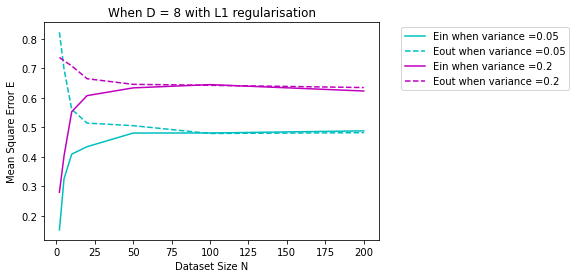

Ein [array([0.1997247]), array([0.32709068]), array([0.38223852]), array([0.42844943]), array([0.44881989]), array([0.45063592]), array([0.45470071])]
Eout [array([0.82117327]), array([0.66752448]), array([0.59113055]), array([0.51142578]), array([0.47763807]), array([0.46839407]), array([0.45873534])]
Ein [array([0.26804231]), array([0.47280069]), array([0.55034671]), array([0.58902914]), array([0.5820067]), array([0.60075523]), array([0.60639033])]
Eout [array([0.84282794]), array([0.7577948]), array([0.71519595]), array([0.60941361]), array([0.66693003]), array([0.62132163]), array([0.60776183])]


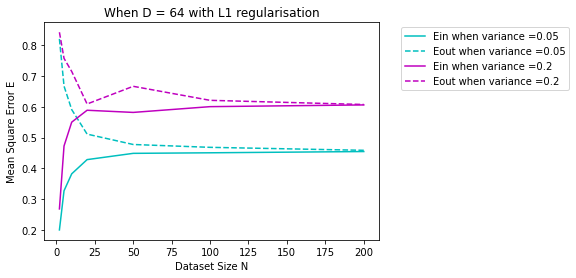

In [9]:
N = [2, 5, 10, 20, 50, 100, 200]
color = ['c-', 'c--', 'm-', 'm--']

for D in [2, 8, 64]:
    i = 0
    for variance in [0.05, 0.2]:
        Ein, Eout = [], []
        for n in N:
            result = experiment(n, D, variance)
            Ein.append(result[0])
            Eout.append(result[1])
        print("Ein", Ein)
        print("Eout", Eout)
        plt.plot(N, Ein, color[i], label="Ein when variance =%s"%(variance))
        plt.plot(N, Eout, color[i+1], label="Eout when variance =%s"%(variance))
        i = i + 2  
    plt.title("When D = %s with L1 regularisation"%(D))
    plt.xlabel("Dataset Size N")
    plt.ylabel("Mean Square Error E")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [15]:
print("N -----\t----- d -----\t----- variance -----\t----- (Ein, Eout)")
for N in [2, 5, 10, 20, 50, 100, 200]:
    for variance in [0.05, 0.2]:
        for d in [1, 2, 4, 8, 16, 32, 64]:
            result = experiment(N, d, variance)
            print(N, "-----\t-----", d, "-----\t-----", variance, "-----\t-----", (result[0], result[1]))

N -----	----- d -----	----- variance -----	----- (Ein, Eout)
2 -----	----- 1 -----	----- 0.05 -----	----- (array([0.1744375]), array([1.07943207]))
2 -----	----- 2 -----	----- 0.05 -----	----- (array([0.24823874]), array([2.40038161]))
2 -----	----- 4 -----	----- 0.05 -----	----- (array([0.23811625]), array([2.69065381]))
2 -----	----- 8 -----	----- 0.05 -----	----- (array([0.14573244]), array([5.01680103]))
2 -----	----- 16 -----	----- 0.05 -----	----- (array([0.26648752]), array([4.69667311]))
2 -----	----- 32 -----	----- 0.05 -----	----- (array([0.20953004]), array([9.52330782]))


KeyboardInterrupt: 